In [ ]:
import torch

In [ ]:
torch.__version__

'2.2.1+cu121'

In [ ]:
torch.tensor

<function torch._VariableFunctionsClass.tensor>

In [ ]:
t_c=torch.tensor([0.5,12.0,0.9,-4.5,8.9,-0.008,2.08,-8.02])
t_u=torch.tensor([5.9,1.2,2.3,3.4,9.07,-9,-6,-5])

In [ ]:
#define the model: w parameter is the weight tensor, which is multiplied with the t_u tensor, result is added with a constant tensor, b, and the loss function chosen is a custom-built one
def model(t_u,w,b):
  return w*t_u+b#linear equation representation of a tensor-based computation

In [ ]:
def loss_fn(t_p,t_c):
  squarred_diffs=(t_p-t_c)**2
  return squarred_diffs.mean()

In [ ]:
w=torch.ones(1)
b=torch.zeros(1)

t_p= model(t_u,w,b)
t_p

tensor([ 5.9000,  1.2000,  2.3000,  3.4000,  9.0700, -9.0000, -6.0000, -5.0000])

In [ ]:
loss=loss_fn(t_p,t_c)

In [ ]:
loss#too high because of the initial round of weights chosen. Therefore, the rate of change in the loss function is essential in updating the weights in the estimation process

tensor(45.6827)

In [ ]:
delta=.1
loss_rate_of_change_w=(loss_fn(model(t_u,w+delta,b),t_c)-loss_fn(model(t_u,w-delta,b),t_c))/(2.0*delta)

In [ ]:
learning_rate=1e-2
w=w-learning_rate*loss_rate_of_change_w

In [ ]:
delta=0.1
loss_rate_of_change_w=(loss_fn(model(t_u,w+delta,b),t_c)-loss_fn(model(t_u,w-delta,b),t_c))/(2.0*delta)

In [ ]:
learning_rate=1e-2
w=w-learning_rate+loss_rate_of_change_w

In [ ]:
loss_rate_of_change_b=(loss_fn(model(t_u,w+delta,b),t_c)-loss_fn(model(t_u,w-delta,b),t_c))/(2.0*delta)

In [ ]:
b=b-learning_rate+loss_rate_of_change_b

In [ ]:
b

tensor([887.9709])

In [ ]:
#MSELoss function in PyTorch
from torch import nn
loss=nn.MSELoss()
input=torch.randn(10,5,requires_grad=True)
target=torch.randn(10,5)
output=loss(input,target)
output.backward()

In [ ]:
output

tensor(1.5721, grad_fn=<MseLossBackward0>)

In [ ]:
# Estimating the Derivative of the Loss Function (grad_fn is a derivative of the loss function with respect to the parameters of the model)

In [ ]:
def dloss_fn(t_p,t_c):
  dsq_diffs=2*(t_p-t_c)
  return dsq_diffs

In [ ]:
def model(t_u,w,b):
  return w*t_u+b

In [ ]:
def dmodel_dw(t_u,w,b):
  return t_u

In [ ]:
def dmodel_db(t_u,w,b):
  return 1.0

In [ ]:
def grad_fn(t_u,t_c,t_p,w,b):
  dloss_dw=dloss_fn(t_p,t_c)*dmodel_dw(t_u,w,b)
  dloss_db=dloss_fn(t_p,t_c)*dmodel_db(t_u,w,b)
  return torch.stack([dloss_dw.mean(),dloss_db.mean()])

In [ ]:
params=torch.tensor([1.0, 0.0])
nepochs=100
learning_rate=1e-2

for epoch in range(nepochs):
  #forward pass
  w, b =params
  t_p=model(t_u,w,b)
  loss=loss_fn(t_p,t_c)
  print('Epoch %d, Loss %f' %(epoch, float(loss)))
  #backward pass
  grad=grad_fn(t_u,t_c,t_p,w,b)

  print('Params:',params)
  print('Grad:',grad)

  params=params-learning_rate*grad

params

Epoch 0, Loss 45.682720
Params: tensor([1., 0.])
Grad: tensor([41.2075, -2.4955])
Epoch 1, Loss 34.522964
Params: tensor([0.5879, 0.0250])
Grad: tensor([12.6454, -2.6382])
Epoch 2, Loss 33.407845
Params: tensor([0.4615, 0.0513])
Grad: tensor([ 3.8893, -2.6446])
Epoch 3, Loss 33.239307
Params: tensor([0.4226, 0.0778])
Grad: tensor([ 1.2048, -2.6099])
Epoch 4, Loss 33.162247
Params: tensor([0.4105, 0.1039])
Grad: tensor([ 0.3816, -2.5633])
Epoch 5, Loss 33.096199
Params: tensor([0.4067, 0.1295])
Grad: tensor([ 0.1290, -2.5138])
Epoch 6, Loss 33.033512
Params: tensor([0.4054, 0.1547])
Grad: tensor([ 0.0513, -2.4642])
Epoch 7, Loss 32.973377
Params: tensor([0.4049, 0.1793])
Grad: tensor([ 0.0272, -2.4151])
Epoch 8, Loss 32.915623
Params: tensor([0.4046, 0.2034])
Grad: tensor([ 0.0196, -2.3669])
Epoch 9, Loss 32.860153
Params: tensor([0.4044, 0.2271])
Grad: tensor([ 0.0171, -2.3197])
Epoch 10, Loss 32.806881
Params: tensor([0.4043, 0.2503])
Grad: tensor([ 0.0161, -2.2734])
Epoch 11, Loss 32

tensor([0.3977, 1.2035])

In [ ]:
#fine-tune of this model
def model(t_u,w,b):
  return w*t_u+b

In [ ]:
def loss_fn(t_p,t_c):
  sq_diffs=(t_p-t_c)**2
  return sq_diffs.mean

In [ ]:
params=torch.tensor([1.0,0.0],requires_grad=True)
loss=loss_fn(model(t_u,*params),t_c)
params.grad is None

True

In [ ]:
def model(t_u,w,b):
  return w*t_u+b

In [ ]:
def loss_fn(t_p,t_c):
  sq_diffs=(t_p-t_c)**2
  return sq_diffs.mean()

Here, we have impoorted optim.

In [ ]:
import torch.optim as optim

In [ ]:
params=torch.tensor([1.0,0.0]
    ,requires_grad=True
)
nepochs=5000
learning_rate=1e-1
optimizer=optim.Adam([params],lr=learning_rate)

In [ ]:
for epoch in range(nepochs):
  #pass-forward
  t_p=model(t_u,*params)
  loss=loss_fn(t_p,t_c)

  print('Epoch %d, Loss %f'%(epoch, float(loss)))
  #pass-backward
  optimizer.zero_grad()
  loss.backward
  optimizer.step()

t_p=model(t_u, *params)

params

Epoch 0, Loss 45.682720
Epoch 1, Loss 45.682720
Epoch 2, Loss 45.682720
Epoch 3, Loss 45.682720
Epoch 4, Loss 45.682720
Epoch 5, Loss 45.682720
Epoch 6, Loss 45.682720
Epoch 7, Loss 45.682720
Epoch 8, Loss 45.682720
Epoch 9, Loss 45.682720
Epoch 10, Loss 45.682720
Epoch 11, Loss 45.682720
Epoch 12, Loss 45.682720
Epoch 13, Loss 45.682720
Epoch 14, Loss 45.682720
Epoch 15, Loss 45.682720
Epoch 16, Loss 45.682720
Epoch 17, Loss 45.682720
Epoch 18, Loss 45.682720
Epoch 19, Loss 45.682720
Epoch 20, Loss 45.682720
Epoch 21, Loss 45.682720
Epoch 22, Loss 45.682720
Epoch 23, Loss 45.682720
Epoch 24, Loss 45.682720
Epoch 25, Loss 45.682720
Epoch 26, Loss 45.682720
Epoch 27, Loss 45.682720
Epoch 28, Loss 45.682720
Epoch 29, Loss 45.682720
Epoch 30, Loss 45.682720
Epoch 31, Loss 45.682720
Epoch 32, Loss 45.682720
Epoch 33, Loss 45.682720
Epoch 34, Loss 45.682720
Epoch 35, Loss 45.682720
Epoch 36, Loss 45.682720
Epoch 37, Loss 45.682720
Epoch 38, Loss 45.682720
Epoch 39, Loss 45.682720
Epoch 40, 

tensor([1., 0.], requires_grad=True)

Now, we will display a graph that has a line shown as a regression line between the computed and predicted tensors.

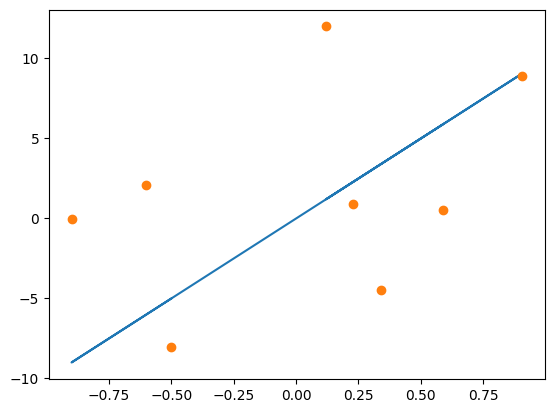

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(0.1*t_u.numpy(),t_p.detach().numpy())
plt.plot(0.1*t_u.numpy(),t_c.numpy(),'o')

In [ ]:
#Further Optimizing the Function-accuracy, validation, shuffle_indices
nsamples=t_u.shape[0]
n_val=int(0.2*nsamples)
shuffle_indices=torch.randperm(nsamples)
train_indices=shuffle_indices[:-n_val]
val_indices=shuffle_indices[-n_val:]

train_indices,val_indices

(tensor([3, 1, 4, 7, 5, 0, 2]), tensor([6]))

In [ ]:
t_u_train=t_u[train_indices]
t_c_train=t_c[train_indices]

t_u_val=t_u[val_indices]
t_c_val=t_c[val_indices]

In [ ]:
def model(t_u,w,b):
  return w*t_u+b

In [ ]:
def loss_fn(t_p,t_c):
  sq_diffs=(t_p-t_c)**2
  return sq_diffs.mean()

In [ ]:
params=torch.tensor([1.0,0.0],requires_grad=True)

In [ ]:
nepochs=5000
learning_rate=1e-2
optimizer=optim.SGD([params],lr=learning_rate)
t_un_train=.1*t_u_train
t_un_val=0.1*t_u_val

In [ ]:
for epoch in range(nepochs):
  #forward pass
  t_p_train=model(t_un_train,*params)
  loss_train=loss_fn(t_p_train,t_c_train)
  #t_p_val=model(t_un_train,t_c_train)
  t_p_val=model(t_un_val,*params)
  loss_val=loss_fn(t_p_val,t_c_val)

  print('Epoch %d, Training Loss %f, Validation Loss %f', (epoch,float(loss_train),float(loss_val)))

  #backward pass
  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()
  t_p=model(t_un,*params)

params

Epoch %d, Training Loss %f, Validation Loss %f (0, 40.89301681518555, 7.182399272918701)


NameError: name 't_un' is not defined